<a href="https://colab.research.google.com/github/Rul3ss/Neural-networks-ATV/blob/main/Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 1 = dataset heart-disease


In [ ]:
from google.colab import userdata
import os
import numpy as np

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d data855/heart-disease

!unzip "heart-disease.zip"

Dataset URL: https://www.kaggle.com/datasets/data855/heart-disease
License(s): CC0-1.0
heart-disease.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-disease.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd

# Carregar o arquivo CSV descompactado do dataset "Heart Disease"
data = pd.read_csv("heart.csv",index_col=None)  # Certifique-se de que o nome do arquivo esteja correto

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data['chol']

,chol
0,233
1,250
2,204
3,236
4,354
...,...
298,241
299,264
300,193
301,131


In [ ]:
data['chol'].describe()

,chol
count,303.000000
mean,246.264026
std,51.830751
min,126.000000
25%,211.000000
50%,240.000000
75%,274.500000
max,564.000000


In [ ]:
def filter(x):
    if x <= 211:
        return 'low'
    if (x > 211 and x <= 240):
        return 'normal'
    if (x > 240 and x <= 275):
        return 'elevated'
    elif(x > 275):
      return 'high chol'

data['chol_cat'] = data['chol'].apply(filter)

In [ ]:
data[['chol', 'chol_cat']]

,chol,chol_cat
0,233,normal
1,250,elevated
2,204,low
3,236,normal
4,354,high chol
...,...,...
298,241,elevated
299,264,elevated
300,193,low
301,131,low


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
X, y = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', ]], data['chol']

X = X.replace(' g','', regex=True)
X = X.replace('g','', regex=True)
X = X.replace('mg','', regex=True)
X = X.replace('m','', regex=True)
X = X.replace(' m','', regex=True)
X = X.replace('c','', regex=True)
X = X.replace(' IU','', regex=True)

# X = X.astype(float)
# y = y.astype(float)

X = np.asarray(X).astype('float32')



In [ ]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]], dtype=float32)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [ ]:
y = y.astype('category').cat.codes
y = np.asarray(y).astype('int')
y

array([ 64,  80,  35,  67, 145,  25, 116,  92,  31,   9,  69, 103,  95,
        42, 109,  50, 141,  57,  77,  69,  65,  64,  57,  73,  31, 121,
        43,  13, 150,  29,  30,  15,  50, 101,  44,  15, 123,  63,  98,
       146, 127,  75,  39,  93, 134, 136,  66,  86,  47,  65,  85, 121,
        62,   2,  81,  33,  53,  89,  18, 122,  94, 128,  22,  34,  42,
        19,  53,  65,  51,  40,  87,  58,  35,  90,  44,  80,  75,  52,
        36,  70,  80, 127, 132, 118,  94, 151, 105,  29,  45,  78,  84,
        38,  54, 112,   5,  57, 147,  64, 131,  76,  74,  99,  27,  70,
        28,  42,  65,  67,  74,  83, 136,   0, 130,  42,  91,  46,  45,
        26,  35,  73, 122, 100,  97,  96,  31,  41,  35, 105,  28,  98,
        33, 100, 117,  66, 125,  98,  16,  39,  33,  92, 117, 122,  40,
        54,  29,  75,  72,  70,  57,  17,  59,   3,  58, 106,  51,  29,
        82,  25,  51,  52,  70, 143,   4,  13,  13, 111,  60,  97,  83,
        34,  85,  60, 110,  55,  37,   8,  61, 140,  15, 104, 14

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5)

print('Shape de x_train', x_train.shape)
print('Shape de x_val', x_val.shape)
print('Shape de x_test', x_test.shape)

print('Shape de y_train', y_train.shape)
print('Shape de y_val', y_val.shape)
print('Shape de y_test', y_test.shape)

Shape de x_train (121, 13)
Shape de x_val (121, 13)
Shape de x_test (61, 13)
Shape de y_train (121,)
Shape de y_val (121,)
Shape de y_test (61,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout, BatchNormalization, Input

In [ ]:
model = Sequential()
#model.add(BatchNormalization()) #Faz cair muito a precisão, em cerca de ~10%
#model.add(Dropout(0.6))

model.add(Input(shape=(12,)))
model.add(Dense(64, activation='tanh'))

model.add(Dense(32), Activation('relu'))

model.add(Dense(16), Activation('relu'))

model.add(Dense(4, activation='softmax'))

from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lembrar de colocar o perception também


In [ ]:
print(x_train.shape)

(121, 13)


In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
83,0.479167,1.0,1.000000,0.547170,0.392694,1.0,0.5,0.816794,0.0,0.193548,0.5,0.00,1.000000
68,0.312500,1.0,0.333333,0.245283,0.214612,0.0,0.5,0.755725,0.0,0.000000,1.0,0.00,0.666667
99,0.500000,1.0,0.666667,0.339623,0.273973,1.0,0.0,0.778626,0.0,0.000000,1.0,0.75,0.666667
263,0.708333,0.0,0.000000,0.132075,0.326484,0.0,0.5,0.748092,1.0,0.290323,0.5,0.50,0.666667
256,0.604167,1.0,0.000000,0.320755,0.303653,0.0,0.0,0.450382,1.0,0.483871,0.5,0.50,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.375000,1.0,0.666667,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,1.0,0.00,0.666667
132,0.270833,1.0,0.333333,0.245283,0.385845,0.0,0.5,0.694656,0.0,0.000000,1.0,0.00,0.666667
126,0.375000,1.0,0.000000,0.169811,0.178082,0.0,0.5,0.549618,0.0,0.016129,1.0,0.00,0.666667
136,0.645833,0.0,0.666667,0.245283,0.118721,1.0,0.5,0.190840,0.0,0.000000,1.0,0.00,0.666667


In [ ]:
# Assuming your labels are originally in the range 86 to 131 (based on the error message)
y_train = y_train - min(y_train)

# Divide all labels by the maximum value to normalize them to the range 0-1
y_train = y_train / max(y_train)

# Multiply by 3 (the maximum class index) and convert to integers
y_train = (y_train * 3).astype(int)

# Repeat the same process for y_val
y_val = y_val - min(y_val)
y_val = y_val / max(y_val)
y_val = (y_val * 3).astype(int)

In [ ]:
# Convert the DataFrame to a NumPy array
x_train = x_train.values[:, :12]

# Repeat the same process for x_val
x_val = x_val.values[:, :12]

batch_size = 4
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3008 - loss: 1.3019 - val_accuracy: 0.3306 - val_loss: 1.1458
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4500 - loss: 1.1067 - val_accuracy: 0.3967 - val_loss: 1.1104
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4293 - loss: 1.0675 - val_accuracy: 0.4298 - val_loss: 1.0916
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4991 - loss: 1.0587 - val_accuracy: 0.4132 - val_loss: 1.0773
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4624 - loss: 1.0606 - val_accuracy: 0.5372 - val_loss: 1.0600
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5092 - loss: 1.0409 - val_accuracy: 0.5455 - val_loss: 1.0331
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4923 - loss: 1.0284 - val_accuracy: 0.4380 - val_loss: 1.0328
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5108 - loss: 1.0140 - val_accuracy: 0.6033 - v

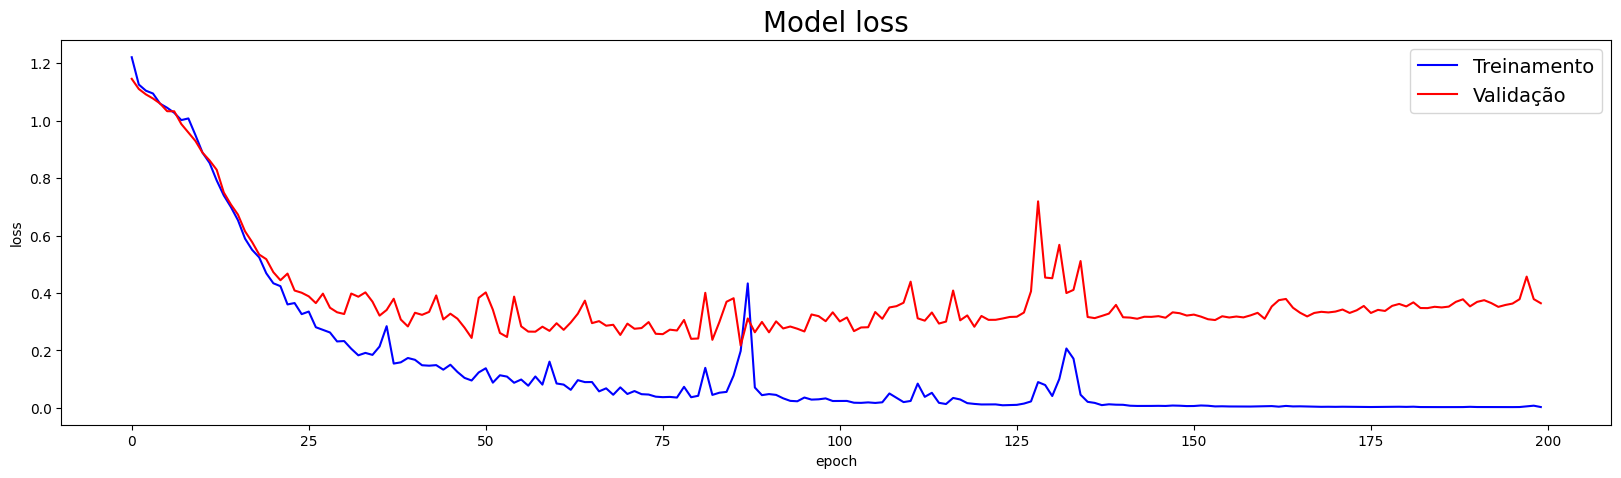

In [ ]:
import matplotlib.pyplot as plt

# Plotando o historico do processo de treinamento
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()